<a href="https://colab.research.google.com/github/PXDHU/TensorFlow/blob/main/02_Neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  * Binary classification
  * Multiclass classifcation
  * Multilabel classification

## Creating data to view

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y= make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


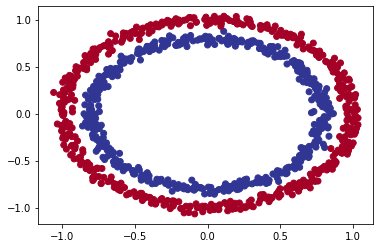

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes 

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# how many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweakk
6. Evaluate...

In [9]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.11.0'

In [10]:
# Set the random seed
tf.random.set_seed = 42

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy") 

# Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.8181 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.2705 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 2.4461 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7555 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.4960


In [11]:
# Let's try and improve our model by training for longer..
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931856870651245, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it's guessing. So let's add an extra layer.

In [12]:
#Set the random seed
tf.random.set_seed=42

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy")

# Fit the model
model_2.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 1.0862 - accuracy: 0.4700
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.4600
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4820
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4840
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4780
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5090
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4870
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4630
Epoch 11/

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5050


[0.6931525468826294, 0.5049999952316284]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

1. Create a model - we might add to more layers or increase the number of hidden units within a layer.
2. Compile a model - we might choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - we might fit our model for more epochs (leave it training for longer).


In [19]:
# Set the random seed
tf.random.set_seed = 43

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100,verbose=0)


In [20]:
# Evaluate a model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4920


[0.6932924389839172, 0.492000013589859]

To visualize our model's prediction, let's create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, features(X), and labels(y)
* Create a meshgrid of the different X value_counts
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (Where each unique class falls)

In [21]:
import numpy as np

def plot_decision_boundary(model, X, y):

  """
  Plots the decision boundary created by a model predicting on X.
  must check:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/Made-With-ML/tree/main/notebooks
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100)) 
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


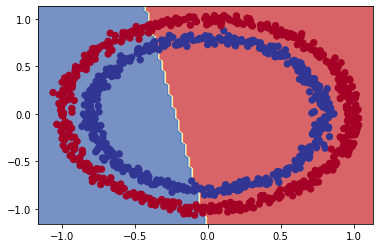

In [22]:
# Check out the predictions our model is making 
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Visualizing what each code does


In [23]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [24]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [25]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

In [26]:
y_pred = model_3.predict(x_in)
y_pred , y_pred.shape


313/313 [==============================] - 1s 2ms/step


(array([[0.51488656],
        [0.5145865 ],
        [0.51428676],
        ...,
        [0.480389  ],
        [0.48008916],
        [0.47978923]], dtype=float32), (10000, 1))

In [27]:
y_pred = np.round(y_pred).reshape(xx.shape)
y_pred

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred.shape, xx.shape

((100, 100), (100, 100))

In [30]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed=42

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to our regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100


ValueError: ignored

Wait.... We compiled our model for a binary classification problem.
But... We're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed = 43

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model (with regression specific loss function)
model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model 
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)




Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 383.3864 - mae: 383.3864
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 279.5085 - mae: 279.5085
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 169.2581 - mae: 169.2581
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 64.5193 - mae: 64.5193
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 70.7784 - mae: 70.7784
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 82.9727 - mae: 82.9727
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 57.4434 - mae: 57.4434
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.9402 - mae: 43.9402
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.2424 - mae: 47.2424
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.5479 - mae: 43.5479
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


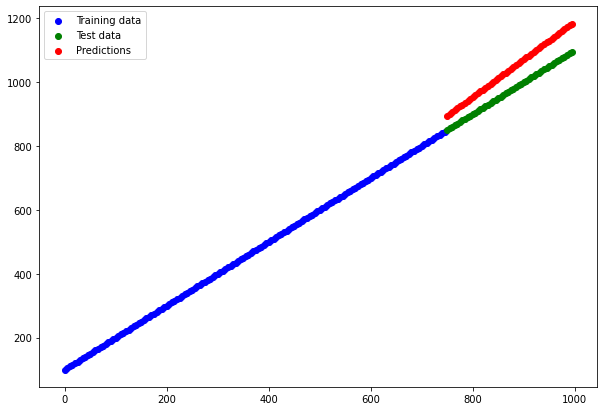

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed = 43

# Create the model
model_4 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3.Fit the model
history = model_4.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7434 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6848 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5834 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5301 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4627 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4382 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4015 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3555 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3474 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3438 - accuracy: 0.4770
Epoch 11/

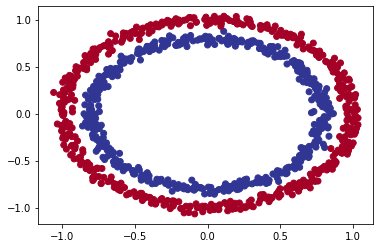

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


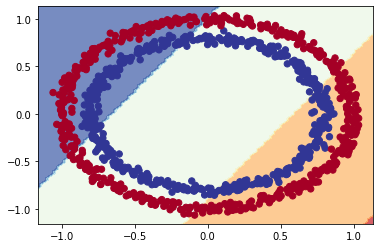

In [ ]:
# Check the desicion boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.


In [ ]:
# Set random seed
tf.random.set_seed = 43

# create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3761 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2583 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1570 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9982 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7383 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6828 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6111 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5939 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5651 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5565 - accuracy: 0.4740
Epoch 11/

In [ ]:
# Replicate the multilayer neural network from TensorFlow Playground 

# Set random seed 
tf.random.set_seed = 43

# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile our model
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

#Fit our model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 6ms/step - loss: 1.9921 - accuracy: 0.4320
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 1.5365 - accuracy: 0.4640
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 1.4312 - accuracy: 0.4730
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 1.3617 - accuracy: 0.4710
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 1.3061 - accuracy: 0.4670
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 1.2582 - accuracy: 0.4670
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 1.2186 - accuracy: 0.4740
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 1.1830 - accuracy: 0.4750
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 1.1509 - accuracy: 0.4750
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 1.1213 - accuracy: 0.4760
Epoch 11/

In [ ]:
# evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9840


[0.04260701686143875, 0.984000027179718]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


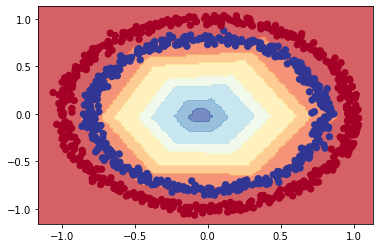

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed 
tf.random.set_seed = 43

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our model
model_7.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

#Fit our model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4920
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5100
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5080
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5320
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5240
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5240
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5280
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5320
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5320
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5290
Epoch 11/

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8470


[0.4107552468776703, 0.847000002861023]

313/313 [==============================] - 1s 1ms/step
Doing binary classification


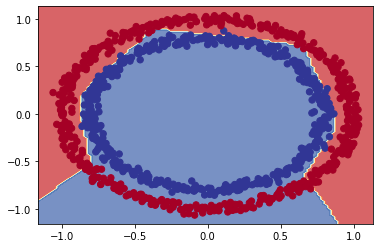

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Questions:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear(non-straight lines) function** is one of the key fundamentals of neural networks.

Now we've discusses the concept of linear and non-linear functions(or lines),let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

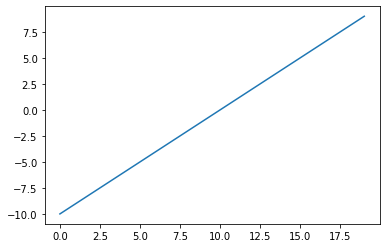

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1 + exp(-x))
def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

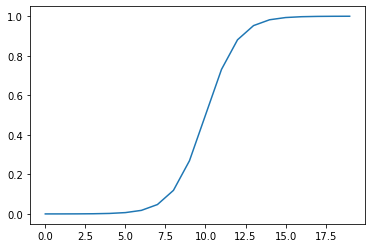

In [ ]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

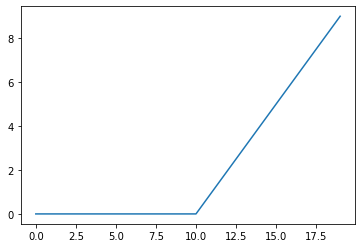

In [ ]:
# Plot Relu-modified tensor
plt.plot(relu(A));

In [ ]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

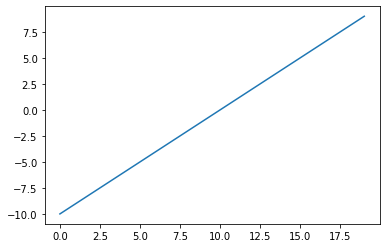

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification
So far we've been training and testing on the same dataset..

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many examples we have 
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data anf evaluate on the testing data

# Set random seed
tf.random.set_seed = 43

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.1),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5038
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.4975
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.4988
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.4988
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.4988
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5838
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5175
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6325
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6687
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3284 - accuracy: 0.9950


[0.3284232020378113, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


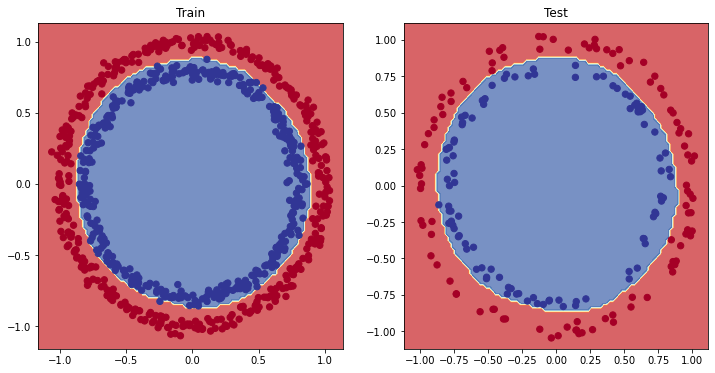

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X = X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

##Plot the loss(or training) curves

In [ ]:
# Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.695698,0.50375
1,0.690810,0.49750
2,0.688185,0.49875
3,0.685458,0.49875
4,0.683118,0.49875
5,0.679674,0.49875
6,0.676230,0.58375
7,0.672380,0.51750
8,0.667663,0.63250
9,0.662002,0.66875


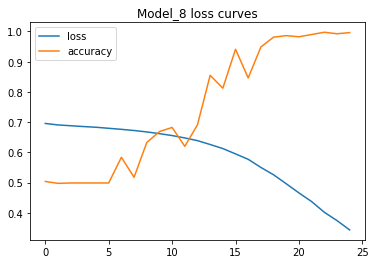

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");


**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting close to the ground truth labels.)

## Finding the best learning rate 

To find the ideal learning rate(the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practically building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed = 43

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6920 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<AxesSubplot:xlabel='epochs'>

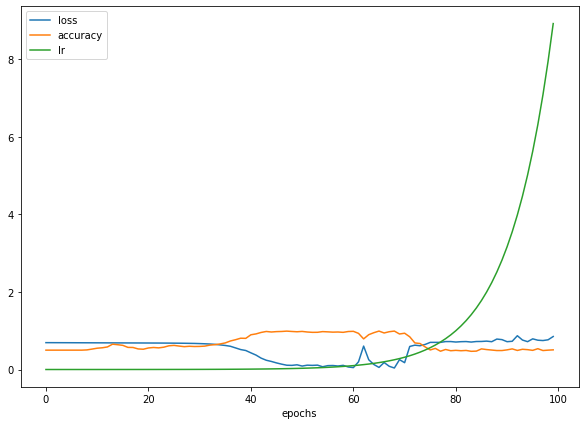

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

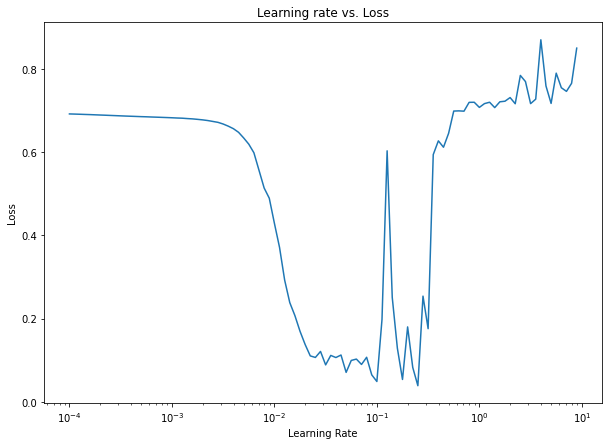

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)